## 🎨 Data Science

In this notebook we will be dealing with a popular customer churn dataset. The objective of this dataset is to learn the reasons or conditions under which customers exit a company. If a company has a high churn rate, then that's a sign it needs change.

In [1]:
import pandas as pd

# TODO [1]: Read 'churn.csv' into a DataFrame. 
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# TODO [2]: Keep only the numerical columns. Hint: df = df.drop(columns=['Col1', 'Col2',... ]) can be faster 
df = df.drop(columns=['Geography', 'Gender', 'Surname'])
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# TODO [3]: Check if there are any missing values and fill them with the mean if the column if there is
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
df = df.fillna(df.mean()) 

Missing values per column:
 RowNumber          0
CustomerId         0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
# TODO [4]: Check statistics for the table
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
# TODO [5]: Get rows of highest salary and lowest salary in a new dataframe
df[(df['EstimatedSalary'] == df['EstimatedSalary'].max()) | (df['EstimatedSalary'] == df['EstimatedSalary'].min())]

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,2363,15791053,709,45,4,122917.71,1,1,1,11.58,1
6646,6647,15662021,685,42,2,0.00,2,0,0,199992.48,0


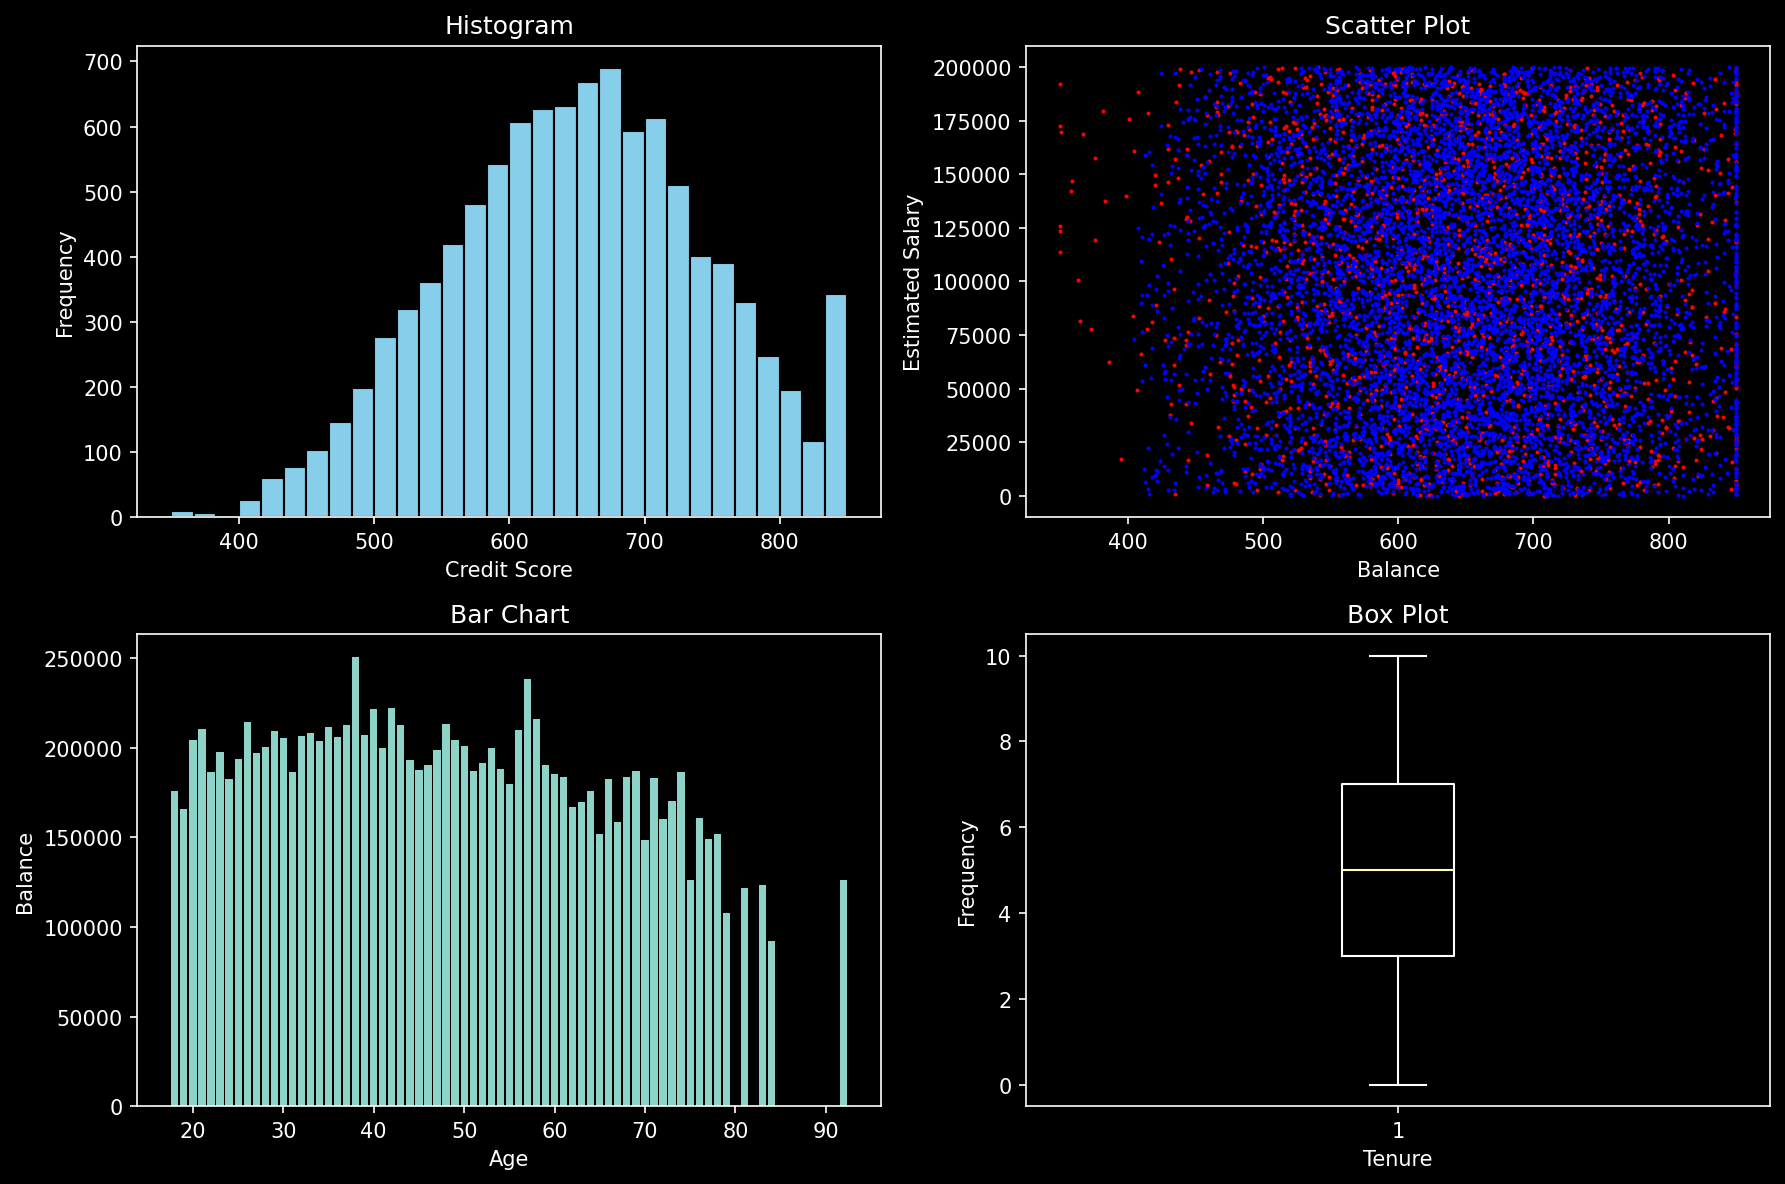

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# TODO [6]: Create potentially meaningful plot for the dataset

# Create subplots
plt.style.use('dark_background')            
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=150)
# treat each axs just like plt

# TODO [6.1]: Plot a histogram
credit_score = df['CreditScore']
axs[0, 0].hist(credit_score, bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram')
axs[0, 0].set_xlabel('Credit Score')
axs[0, 0].set_ylabel('Frequency')

# TODO [6.2]: Plot a scatter plot of CreditScore VS. Salary
# TODO [6.2.1]: Get credit score and salaries for exited customers and plot
score_exit = df[df['Exited']==1]['CreditScore']
salary_exit = df[df['Exited']==1]['EstimatedSalary']
# small dots
axs[0, 1].scatter(score_exit, salary_exit, color='red', s=0.9)
# TODO [6.2.2]: Get credit score and salaries for non-exited customers and plot
score_nonexit = df[df['Exited']==0]['CreditScore']
salary_nonexit =df[df['Exited']==0]['EstimatedSalary']
axs[0, 1].scatter(score_nonexit, salary_nonexit, color='blue', s=0.9)
axs[0, 1].set_title('Scatter Plot')
axs[0, 1].set_xlabel('Balance')
axs[0, 1].set_ylabel('Estimated Salary')

# TODO [6.3]: Plot a bar chart
age, balance =df['Age'],df['Balance']
axs[1, 0].bar(age, balance)
axs[1, 0].set_title('Bar Chart')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Balance')

# TODO [6.4]: Plot a box plot for tenure
tenure = df['Tenure']
axs[1, 1].boxplot(tenure)
axs[1, 1].set_title('Box Plot')
axs[1, 1].set_xlabel('Tenure')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()